1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def f(w):
    x = w[0]
    y = w[1]
    return (4.0 - 2.1*x*x + (x**4)/3.0)*x*x + x*y + (4.0*y*y - 4.0)*y*y

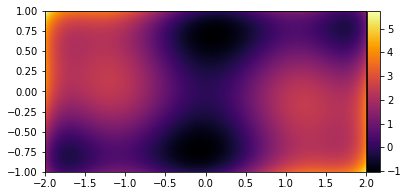

In [28]:
xm = np.arange(-2.0, 2.0, 0.01)
ym = np.arange(-1.0, 1.0, 0.01)
xn, yn = np.meshgrid(xm, ym)

fig, ax = plt.subplots(1,1,figsize=(6,4))
image = ax.imshow(f([xn,yn]), cmap='inferno', extent=[-2, 2, -1, 1])
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="4%", pad=0.01 , )
fig.colorbar(image, cax = cax1)
plt.show()

In [20]:
st_points = [[0,0.75], [0,-0.75], [-2, 0.75], [2, -0.75]]

for point in st_points:
    minima = optimize.minimize(f, point)
    print("minimum found:", minima.x, "\tf=", minima.fun)

minimum found: [-0.08984202  0.71265641] 	f= -1.031628453489877
minimum found: [ 0.08984201 -0.71265642] 	f= -1.0316284534898743
minimum found: [-0.08984237  0.71265591] 	f= -1.0316284534871918
minimum found: [ 0.08984236 -0.71265592] 	f= -1.0316284534873517


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats

In [45]:
T_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
T_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month = np.array(range(1,13))

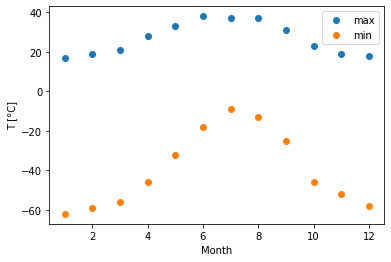

In [46]:
plt.plot(month, T_max, 'o', label='max')
plt.plot(month, T_min, 'o', label='min')
plt.xlabel('Month')
plt.ylabel('T [°C]')
plt.legend()
plt.show()

In [53]:
def func(x, constant, mu, sigma, baseline):
    return constant*stats.norm.pdf(x, mu, sigma) + baseline


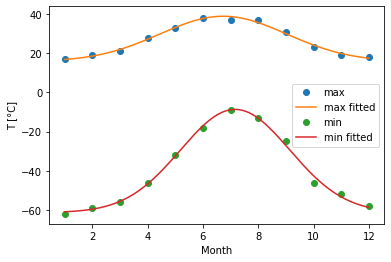

In [51]:
xs = np.arange(1.0,12.0,0.01)
plt.plot(month, T_max, 'o', label='max')
plt.plot(xs,func(xs, par_T_max[0], par_T_max[1], par_T_max[2], par_T_max[3]), label='max fitted')
plt.plot(month, T_min, 'o', label='min')
plt.plot(xs,func(xs, par_T_min[0], par_T_min[1], par_T_min[2], par_T_min[3]), label='min fitted')
plt.xlabel('Month')
plt.ylabel('T [°C]')
plt.legend()
plt.show()

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.